In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn.cluster as KMeans

In [3]:
data = pd.read_csv('HR Employee Attrition(1).csv')
data

,S. No.,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [4]:
data.describe()

,S. No.,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumOfPrevEmployers,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data = data.dropna(axis=0)

In [6]:
data.shape

(1470, 30)

In [7]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

/Users/jainendrasingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

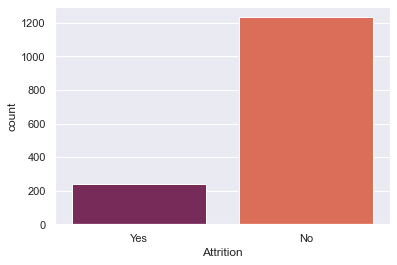

In [8]:
sns.countplot(data['Attrition'], palette = 'rocket')

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

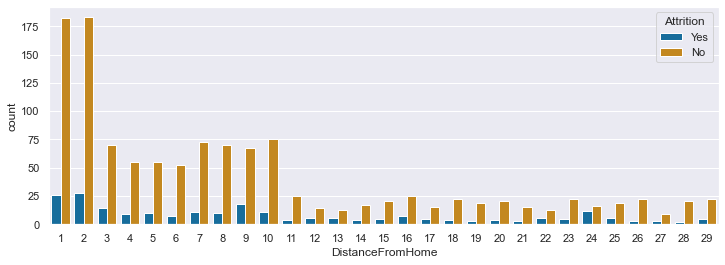

In [10]:
plt.subplots(figsize=(12,4))
sns.countplot(x= 'DistanceFromHome', hue = 'Attrition' , data = data , palette = 'colorblind')

In [11]:
for column in data.columns:
    if data[column].dtype == object:
        print (str(column) + ' : ' + str(data[column].unique()))
        print (data[column].value_counts())
        print('_____________________________')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_____________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_____________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_____________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_____________________________
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_____________________________
JobRole : ['Sales Executive' 'Research 

In [12]:
df = df.drop('S. No.',axis = 1)

NameError: name 'df' is not defined

In [13]:
data.corr()

,S. No.,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumOfPrevEmployers,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
S. No.,1.000000,-0.010349,0.032928,0.041901,0.017424,0.034754,-0.007105,-0.018041,-0.045941,-0.000689,...,-0.020675,-0.069654,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.299635,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,0.032928,-0.001686,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.029251,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.126317,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.017424,0.010146,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,0.012594,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,0.022157,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.007105,0.029820,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,0.015012,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.018041,0.509604,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.142501,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.045941,-0.004892,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.055699,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
NumOfPrevEmployers,-0.000689,0.299635,-0.029251,0.126317,0.012594,0.022157,0.015012,0.142501,-0.055699,1.000000,...,-0.014095,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319


<AxesSubplot:>

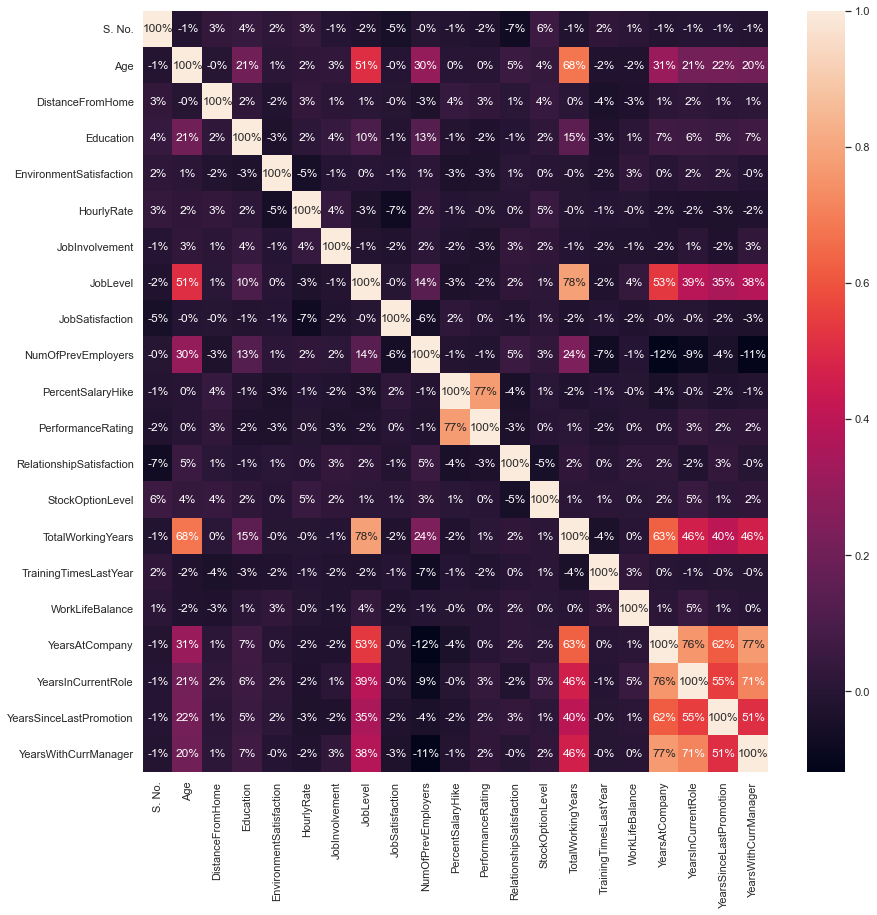

In [14]:
plt.figure(figsize = (14,14))
sns.heatmap(data.corr() , annot = True , fmt = '.0%')